## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('salaries.csv')
target = 'salary_in_usd'
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M


## Analyse how factors such as country, experience level, and remote ratio impact salaries for Data Analysts, Data Scientists, and Machine Learning Engineers. In which conditions do professionals achieve the highest salaries?

In [3]:
# Filter for Data Analysts, Data Scientists, and Machine Learning Engineers
roles_of_interest = ['Data Analyst', 'Data Scientist', 'Machine Learning Engineer']
filtered_df = df[df['job_title'].isin(roles_of_interest)]


experience_map = {
    'SE': 'Senior',
    'MI': 'Mid-level',
    'EN': 'Entry-level',
    'EX': 'Executive'
}

# Task 1: Average salary by country, experience level, and remote ratio
avg_salary_by_country = filtered_df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
avg_salary_by_experience = filtered_df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
avg_salary_by_experience.index = [experience_map[role] for role in avg_salary_by_experience.index]
avg_salary_by_remote_ratio = filtered_df.groupby('remote_ratio')['salary_in_usd'].mean()

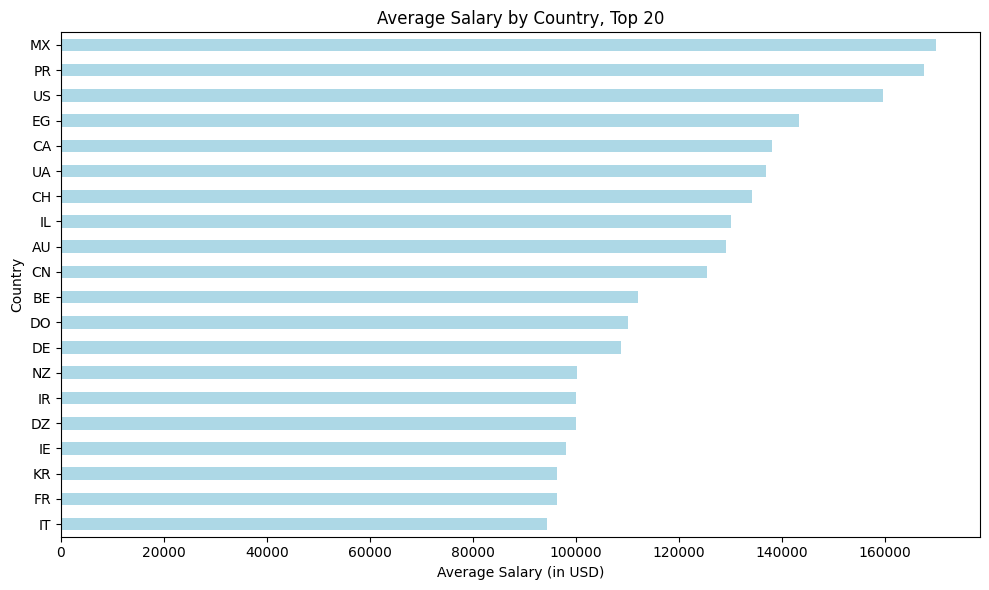

In [4]:
# Task 1: Visualize the results for salary impact analysis
top = 20

# Visualization for Average Salary by Country
plt.figure(figsize=(10, 6))
avg_salary_by_country[:top][::-1].plot(kind='barh', color='lightblue')
plt.title(f'Average Salary by Country, Top {top}')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

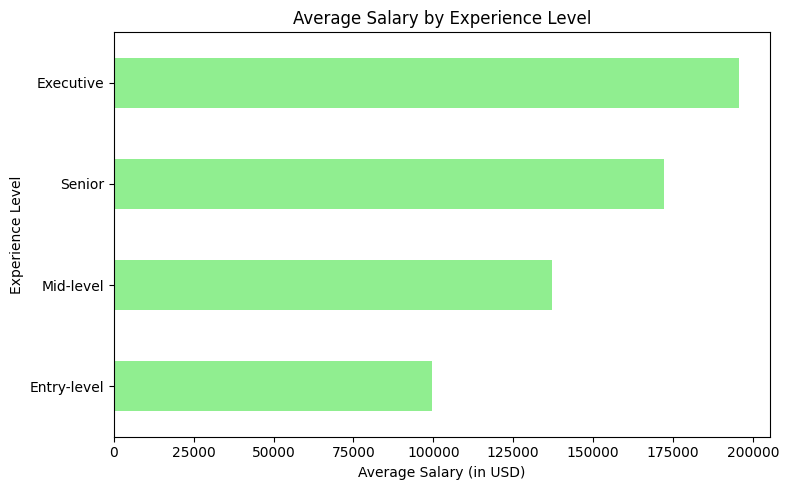

In [5]:
# Visualization for Average Salary by Experience Level
plt.figure(figsize=(8, 5))
avg_salary_by_experience[::-1].plot(kind='barh', color='lightgreen')
plt.title('Average Salary by Experience Level')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Experience Level')
plt.tight_layout()
plt.show()

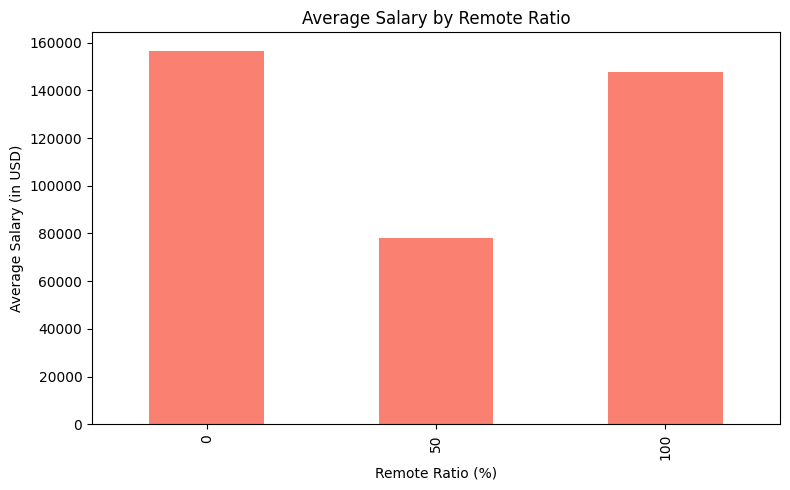

In [6]:
# Visualization for Average Salary by Remote Ratio
plt.figure(figsize=(8, 5))
avg_salary_by_remote_ratio.plot(kind='bar', color='salmon')
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Average Salary (in USD)')
plt.tight_layout()
plt.show()

## Develop a predictive model to estimate an employee’s salary (in USD) using experience level, company location, and remote ratio. Which features are the strongest predictors of salary?

In [7]:
df1 = df.copy()
df1 = df1.rename(columns = {'company_location': 'company_loc', 'job_title': 'job', 'employment_type': 'type'})

# Years ago
# df1['years_ago'] = 2024 - df1['work_year']

# LabelEncoder: experience
le = LabelEncoder()
df1['experience_level'] = le.fit_transform(df1['experience_level'])

# OHE: company location
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['company_loc']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['company_loc']))
df_encoded = pd.concat([df1, encoded_df], axis = 1)

df_encoded = df_encoded.drop(['work_year','salary_currency','salary','employee_residence','company_size', 'company_loc', 'job', 'type'], axis = 1)

In [8]:
# Prepare the features (X) and target (y) for training the model
X = df_encoded.drop(target, axis = 1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Evaluate the model
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = rf.score(X_test, y_test)

np.sqrt(mse)

np.float64(66098.82797688273)

## Expand your model by incorporating additional features, such as company size and employment type. Evaluate its performance, what improves, and what doesn’t? Finally, propose new features to make future salary predictions even more accurate future salary predictions even more accurate.

### Find most predictive features

In [11]:
df1 = df.copy()
df1 = df1.rename(columns = {'company_location': 'company_loc', 'job_title': 'job', 'employment_type': 'type'})

# Years ago
# df1['years_ago'] = 2024 - df1['work_year']

# LabelEncoder: experience
le = LabelEncoder()
df1['experience_level'] = le.fit_transform(df1['experience_level'])

# OHE: company size
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['company_size']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['company_size']))
df_encoded = pd.concat([df1, encoded_df], axis = 1)

# OHE: company location
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['company_loc']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['company_loc']))
df_encoded = pd.concat([df_encoded, encoded_df], axis = 1)

# OHE: employment type
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['type']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['type']))
df_encoded = pd.concat([df_encoded, encoded_df], axis = 1)

# OHE: job title
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['job']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['job']))
df_encoded = pd.concat([df_encoded, encoded_df], axis = 1)

df_encoded = df_encoded.drop(['salary_currency','salary','employee_residence','company_size', 'company_loc', 'job', 'type'], axis = 1)

In [12]:
# Prepare the features (X) and target (y) for training the model
X = df_encoded.drop(target, axis = 1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<Figure size 1000x600 with 0 Axes>

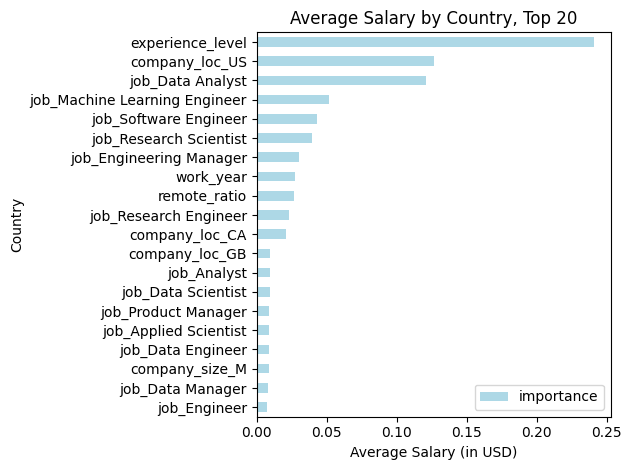

In [13]:
feature_importances = rf.feature_importances_
df_feat = pd.DataFrame(list(zip(X_train.columns, feature_importances)), columns = ['feature', 'importance']).sort_values(by="importance", ascending = False).set_index('feature')

# Task 1: Visualize the results for salary impact analysis
top = 20

# Visualization for Average Salary by Country
plt.figure(figsize=(10, 6))
df_feat[:top][::-1].plot(kind='barh', color='lightblue')
plt.title(f'Average Salary by Country, Top {top}')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Build a new model using the best features

In [14]:
features_to_keep = list(df_feat[:11].index) + [target]
df2 = df_encoded[features_to_keep]

X = df2.drop(target, axis = 1)
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Evaluate the model
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = rf.score(X_test, y_test)

In [17]:
np.sqrt(mse)

np.float64(62409.91778501993)

In [18]:
df1 = df.copy()
df1 = df1.rename(columns = {'company_location': 'company_loc', 'job_title': 'job', 'employment_type': 'type'})

# Years ago
# df1['years_ago'] = 2024 - df1['work_year']

# LabelEncoder: experience
le = LabelEncoder()
df1['experience_level'] = le.fit_transform(df1['experience_level'])

# OHE: company size
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['company_size']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['company_size']))
df_encoded = pd.concat([df1, encoded_df], axis = 1)

# OHE: company location
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['company_loc']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['company_loc']))
df_encoded = pd.concat([df_encoded, encoded_df], axis = 1)

# OHE: employment type
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['type']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['type']))
df_encoded = pd.concat([df_encoded, encoded_df], axis = 1)

# OHE: job title
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = ohe.fit_transform(df1[['job']])
encoded_df = pd.DataFrame(encoded_features, columns = ohe.get_feature_names_out(['job']))
df_encoded = pd.concat([df_encoded, encoded_df], axis = 1)


# Engineering: Avg Salary based on company size
df_encoded['company_size_avg_salary'] = df_encoded.groupby('company_size')['salary_in_usd'].transform('mean')

df_encoded = df_encoded.drop(['salary_currency','salary','employee_residence','company_size', 'company_loc', 'job', 'type'], axis = 1)
df_encoded.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size_M,company_size_S,company_loc_AE,company_loc_AM,company_loc_AR,company_loc_AS,...,job_Staff Data Scientist,job_Staff Machine Learning Engineer,job_Stage,job_Statistical Programmer,job_Statistician,job_Systems Engineer,job_Technical Lead,job_Technical Specialist,job_Technical Writer,company_size_avg_salary
0,2024,2,168276,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159724.759782
1,2024,2,112184,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159724.759782
2,2024,0,180000,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159724.759782
3,2024,0,133500,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159724.759782
4,2024,0,122000,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159724.759782


In [19]:
features_to_keep = list(df_feat[:11].index) + [target, 'company_size_avg_salary']
df2 = df_encoded[features_to_keep]

X = df2.drop(target, axis = 1)
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = rf.score(X_test, y_test)

In [21]:
np.sqrt(mse)

np.float64(62385.72525642963)